In [3]:
import numpy as np
import pandas as pd

# File paths
files = [
    "0.BC_bent_control_betweenness_value_filter0.30.dat",
    "0.BC_bent_Force_betweenness_value_filter0.30.dat",
    "0.BC_bent_ForceRGD_betweenness_value_filter0.30.dat",
    "0.BC_bent_RGD_betweenness_value_filter0.30.dat",
    "0.BC_open_control_betweenness_value_filter0.30.dat",
    "0.BC_open_Force_betweenness_value_filter0.30.dat",
    "0.BC_open_ForceRGD_betweenness_value_filter0.30.dat",
    "0.BC_open_RGD_betweenness_value_filter0.30.dat"
]

# Load data
bent_data = {}
open_data = {}
for file in files:
    condition = file.split('_')[2]  # Extract the condition name (e.g., 'control', 'Force', 'ForceRGD', 'RGD')
    conformation = file.split('_')[1]  # Extract the conformation (bent or open)
    data = pd.read_csv(file, delim_whitespace=True, header=None, names=["Residue", "Betweenness", "Condition"])
    if conformation == 'bent':
        bent_data[condition] = data
    else:
        open_data[condition] = data

# Compare bent and open conformations for each condition and find residues with the highest difference
highest_diff_residues = {}
for condition in bent_data.keys():
    # Merge bent and open data on Residue number for each condition
    merged_data = pd.merge(bent_data[condition], open_data[condition], on="Residue", suffixes=("_bent", "_open"))
    # Calculate the absolute difference between bent and open betweenness values
    merged_data["Difference"] = abs(merged_data["Betweenness_bent"] - merged_data["Betweenness_open"])
    # Find the top 10 residues with the highest difference
    top_10_diff_residues = merged_data.nlargest(10, "Difference")
    highest_diff_residues[condition] = top_10_diff_residues

# Output the top 10 residues with the highest difference for each condition
for condition, residues_info in highest_diff_residues.items():
    print(f"Condition: {condition}")
    for _, residue_info in residues_info.iterrows():
        print(f"Residue: {residue_info['Residue']}")
        print(f"Bent Betweenness: {residue_info['Betweenness_bent']}")
        print(f"Open Betweenness: {residue_info['Betweenness_open']}")
        print(f"Difference: {residue_info['Difference']}")
        print("-")

# Analyze common residues affecting different conditions
common_residues = set(highest_diff_residues['control']['Residue'])
for condition in highest_diff_residues.keys():
    if condition != 'control':
        common_residues.intersection_update(set(highest_diff_residues[condition]['Residue']))

print("\nCommon residues affecting multiple conditions:")
for residue in common_residues:
    print(f"Residue: {residue}")


Condition: control
Residue: 1611
Bent Betweenness: 0.010196
Open Betweenness: 0.001945
Difference: 0.008251
-
Residue: 1031
Bent Betweenness: 0.008938
Open Betweenness: 0.001105
Difference: 0.007833
-
Residue: 297
Bent Betweenness: 0.001008
Open Betweenness: 0.007896
Difference: 0.006888
-
Residue: 262
Bent Betweenness: 0.007285
Open Betweenness: 0.000574
Difference: 0.006711
-
Residue: 1328
Bent Betweenness: 0.000944
Open Betweenness: 0.00746
Difference: 0.006515999999999999
-
Residue: 93
Bent Betweenness: 0.008294
Open Betweenness: 0.0018
Difference: 0.006494
-
Residue: 511
Bent Betweenness: 0.00832
Open Betweenness: 0.00208
Difference: 0.006239999999999999
-
Residue: 261
Bent Betweenness: 0.007531
Open Betweenness: 0.001304
Difference: 0.006227
-
Residue: 1609
Bent Betweenness: 0.007876
Open Betweenness: 0.001806
Difference: 0.006069999999999999
-
Residue: 1325
Bent Betweenness: 0.006442
Open Betweenness: 0.000574
Difference: 0.005868
-
Condition: Force
Residue: 1611
Bent Betweennes

In [28]:
import pandas as pd

# List of file paths
file_paths = [
    "0.BC_bent_control_betweenness_value_filter0.30.dat",
    "0.BC_bent_Force_betweenness_value_filter0.30.dat",
    "0.BC_bent_ForceRGD_betweenness_value_filter0.30.dat",
    "0.BC_bent_RGD_betweenness_value_filter0.30.dat",
    "0.BC_open_control_betweenness_value_filter0.30.dat",
    "0.BC_open_Force_betweenness_value_filter0.30.dat",
    "0.BC_open_ForceRGD_betweenness_value_filter0.30.dat",
    "0.BC_open_RGD_betweenness_value_filter0.30.dat"
]

# Loop through each file and calculate the average of the second column
for file_path in file_paths:
    try:
        # Read the file into a DataFrame (assuming delimiter is whitespace and no header)
        data = pd.read_csv(file_path, delim_whitespace=True, header=None)

        # Calculate the average of the second column (index 1)
        second_column_avg = data[1].mean()

        # Print the result with more precision
        print(f"Average of BC for {file_path}: {second_column_avg:.10f}")

    except FileNotFoundError:
        print(f"File not found: {file_path}")
    except Exception as e:
        print(f"An error occurred while processing {file_path}: {e}")


Average of BC for 0.BC_bent_control_betweenness_value_filter0.30.dat: 0.0016815808
Average of BC for 0.BC_bent_Force_betweenness_value_filter0.30.dat: 0.0016851452
Average of BC for 0.BC_bent_ForceRGD_betweenness_value_filter0.30.dat: 0.0016842192
Average of BC for 0.BC_bent_RGD_betweenness_value_filter0.30.dat: 0.0016804927
Average of BC for 0.BC_open_control_betweenness_value_filter0.30.dat: 0.0017106978
Average of BC for 0.BC_open_Force_betweenness_value_filter0.30.dat: 0.0017106669
Average of BC for 0.BC_open_ForceRGD_betweenness_value_filter0.30.dat: 0.0017096084
Average of BC for 0.BC_open_RGD_betweenness_value_filter0.30.dat: 0.0017112242



Residues with Betweenness Centrality greater than 5 times the control for Force (Bent):
      Residue  Normalized_Betweenness
88         89                5.901060
189       190                7.913428
195       196                7.004878
258       259                7.003350
297       298                7.842756
304       305                5.644809
492       493                6.208113
511       512                6.240283
512       513                7.284158
726       727                5.529322
964       965               10.163636
968       969                7.659693
1013     1014               11.599647
1029     1030                8.848057
1113     1114                5.263251
1125     1126                5.547703
1328     1329                6.247350
1359     1360                8.356890
1397     1398                5.196113
1552     1553                5.592208
1623     1624                5.408304

Residues with Betweenness Centrality greater than 5 times the control for 

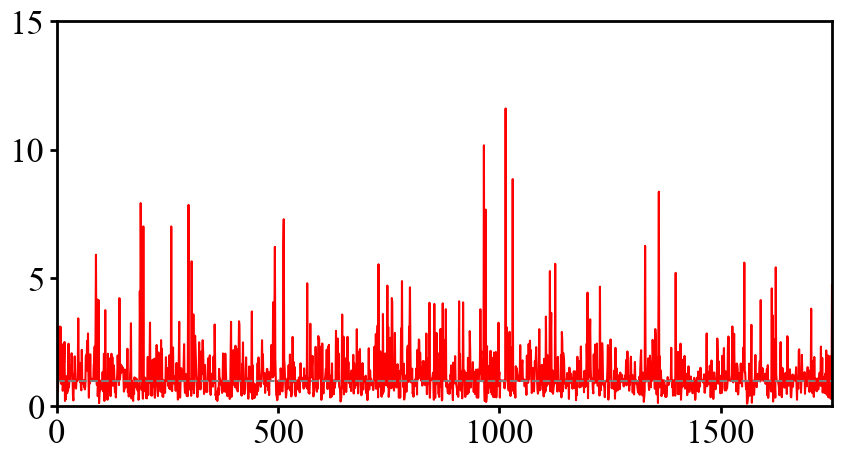

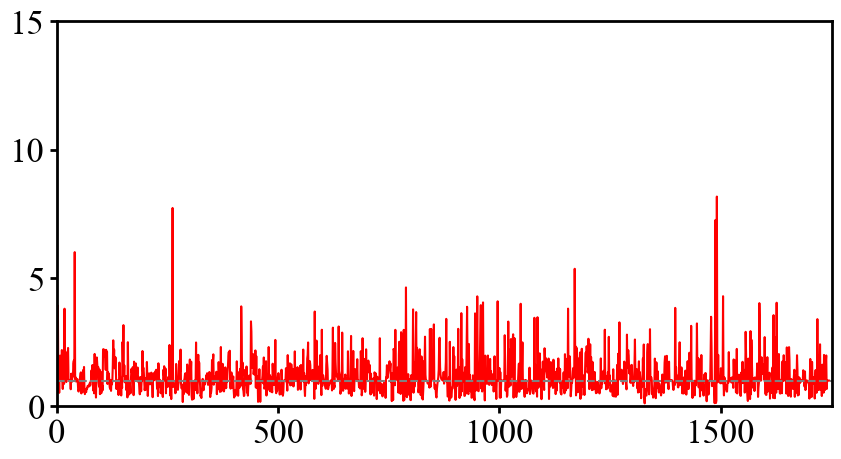

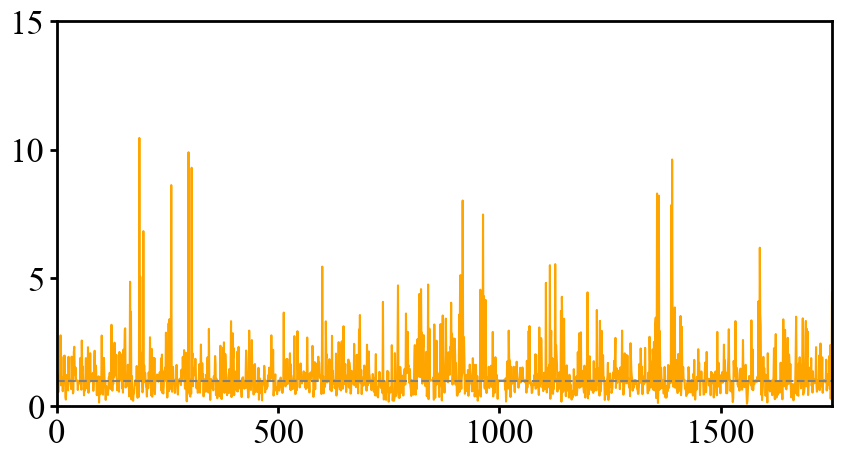

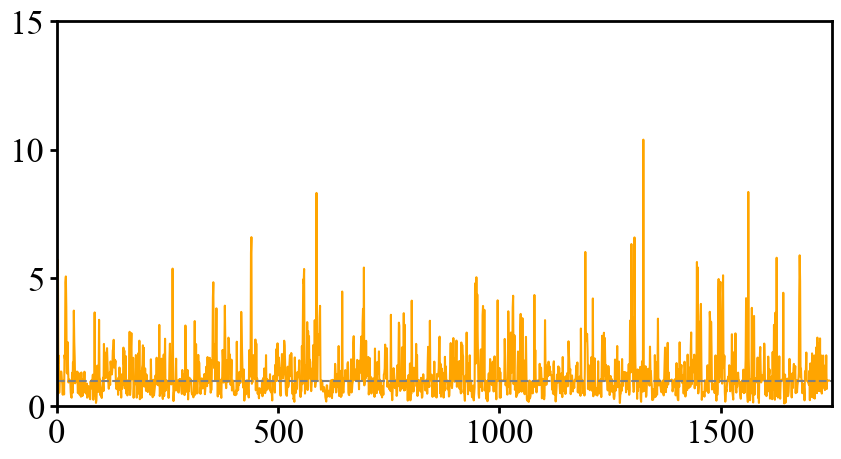

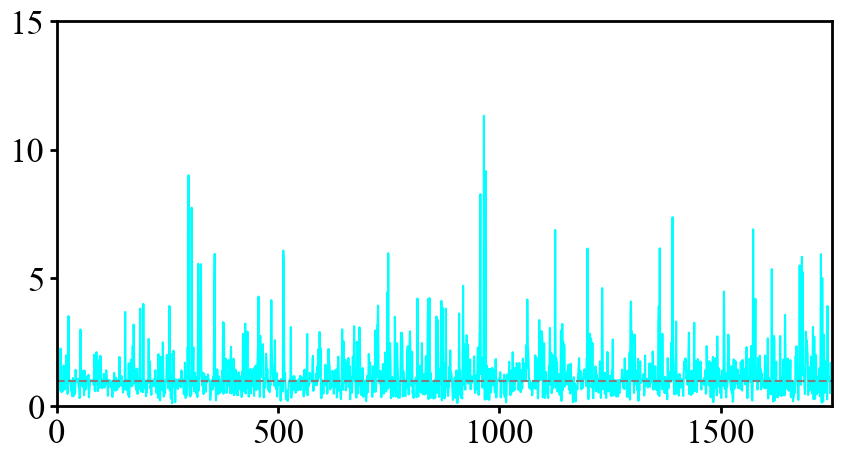

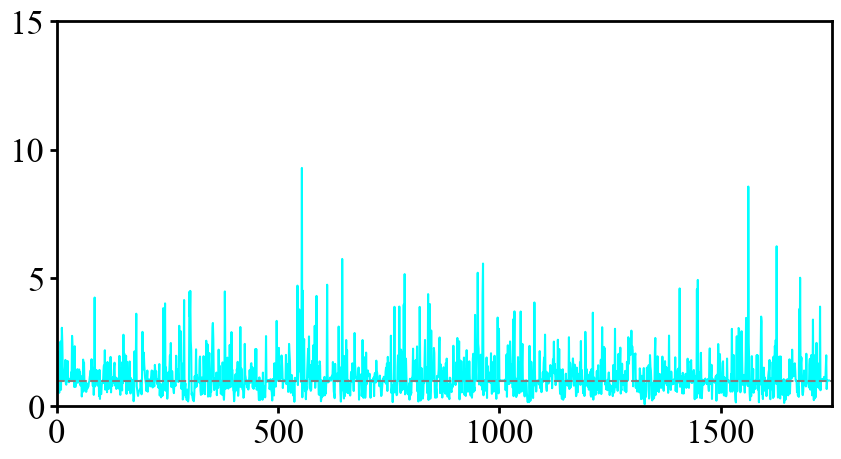

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# File paths
files = [
    "0.BC_bent_control_betweenness_value_filter0.30.dat",
    "0.BC_bent_Force_betweenness_value_filter0.30.dat",
    "0.BC_bent_ForceRGD_betweenness_value_filter0.30.dat",
    "0.BC_bent_RGD_betweenness_value_filter0.30.dat",
    "0.BC_open_control_betweenness_value_filter0.30.dat",
    "0.BC_open_Force_betweenness_value_filter0.30.dat",
    "0.BC_open_ForceRGD_betweenness_value_filter0.30.dat",
    "0.BC_open_RGD_betweenness_value_filter0.30.dat"
]

# Load data
bent_data = {}
open_data = {}
for file in files:
    condition = file.split('_')[2]  # Extract the condition name (e.g., 'control', 'Force', 'ForceRGD', 'RGD')
    conformation = file.split('_')[1]  # Extract the conformation (bent or open)
    data = pd.read_csv(file, delim_whitespace=True, header=None, names=["Residue", "Betweenness", "Condition"])
    if conformation == 'bent':
        bent_data[condition] = data
    else:
        open_data[condition] = data

# Copy the first column of bent control to all bent conditions
reference_residues = bent_data['control']["Residue"]
for condition in bent_data.keys():
    bent_data[condition]["Residue"] = reference_residues

# Normalize each condition to the control condition
bent_control = bent_data['control']
open_control = open_data['control']

normalized_bent_data = {}
normalized_open_data = {}

for condition in bent_data.keys():
    if condition != 'control':
        # Normalize bent data to control
        merged_bent = pd.merge(bent_data[condition], bent_control, on="Residue", suffixes=("", "_control"))
        merged_bent["Normalized_Betweenness"] = merged_bent["Betweenness"] / merged_bent["Betweenness_control"]
        normalized_bent_data[condition] = merged_bent
        
        # Normalize open data to control
        merged_open = pd.merge(open_data[condition], open_control, on="Residue", suffixes=("", "_control"))
        merged_open["Normalized_Betweenness"] = merged_open["Betweenness"] / merged_open["Betweenness_control"]
        normalized_open_data[condition] = merged_open

# Identify residues showing higher BC more than 5 times of control condition
high_bc_residues = {}
for condition in normalized_bent_data.keys():
    high_bc_bent = normalized_bent_data[condition][normalized_bent_data[condition]["Normalized_Betweenness"] > 5]
    high_bc_open = normalized_open_data[condition][normalized_open_data[condition]["Normalized_Betweenness"] > 5]
    high_bc_residues[condition] = {
        "bent": high_bc_bent,
        "open": high_bc_open
    }
    
    print(f"\nResidues with Betweenness Centrality greater than 5 times the control for {condition} (Bent):")
    print(high_bc_bent[["Residue", "Normalized_Betweenness"]])
    
    print(f"\nResidues with Betweenness Centrality greater than 5 times the control for {condition} (Open):")
    print(high_bc_open[["Residue", "Normalized_Betweenness"]])

# Plot normalized betweenness for each condition (bent and open)
plt.rcParams.update({
    'font.size': 25,
    'font.family': 'Times New Roman',
    'figure.figsize': (10, 5),
    'axes.linewidth': 2,
    'xtick.major.size': 5,
    'ytick.major.size': 5,
    'xtick.major.width': 2,
    'ytick.major.width': 2,
})

color_map = {
    'Force': 'red',
    'ForceRGD': 'orange',
    'RGD': 'cyan'
}

for condition in normalized_bent_data.keys():
    # Ensure reference_residues and normalized data have the same length
    bent_plot_data = pd.merge(reference_residues.to_frame(name="Residue"), normalized_bent_data[condition], on="Residue", how="inner")
    open_plot_data = pd.merge(reference_residues.to_frame(name="Residue"), normalized_open_data[condition], on="Residue", how="inner")

    # Plot bent conformation
    plt.figure()
    plt.plot(bent_plot_data["Residue"], bent_plot_data["Normalized_Betweenness"], color=color_map.get(condition, 'blue'))
    plt.xlim(0, 1750)
    plt.ylim(0, 15)
    plt.xticks(np.arange(0, 1751, 500))
    plt.yticks(np.arange(0, 16, 5))
    plt.axhline(1, color='grey', linestyle='--')
    plt.savefig(f'bent_{condition}_normalized.png', format='png', dpi=300, bbox_inches='tight')
    plt.show()

    # Plot open conformation
    plt.figure()
    plt.plot(open_plot_data["Residue"], open_plot_data["Normalized_Betweenness"], color=color_map.get(condition, 'blue'))
    plt.xlim(0, 1750)
    plt.ylim(0, 15)
    plt.xticks(np.arange(0, 1751, 500))
    plt.yticks(np.arange(0, 16, 5))
    plt.axhline(1, color='grey', linestyle='--')
    plt.savefig(f'open_{condition}_normalized.png', format='png', dpi=300, bbox_inches='tight')
    plt.show()


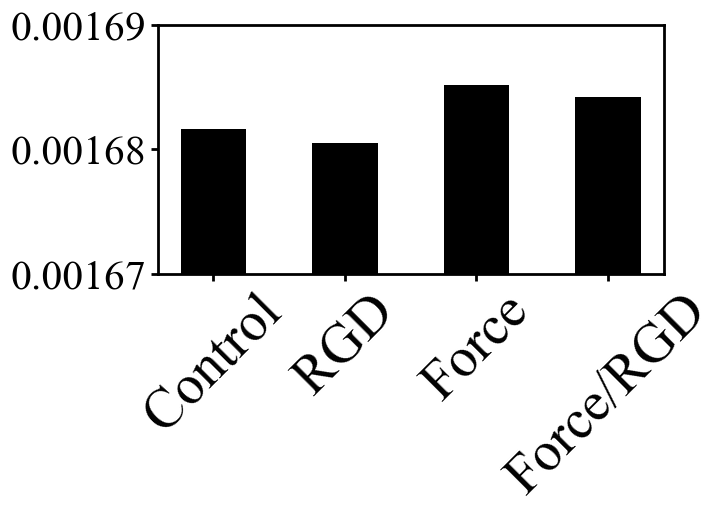

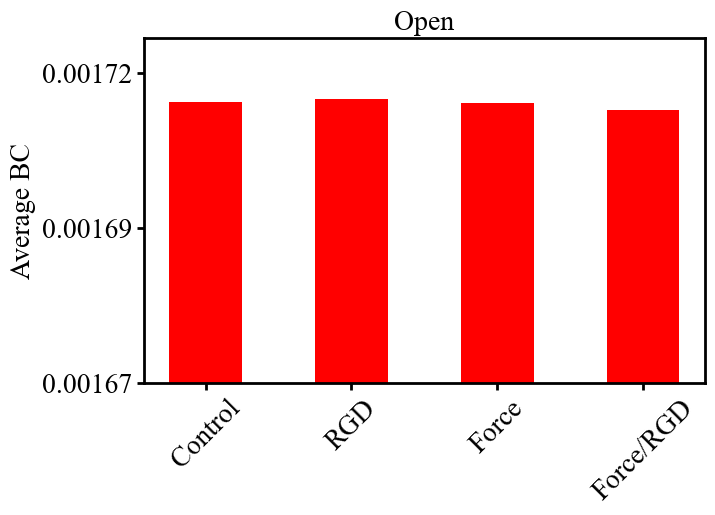

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Average BC values for Bent and Open under different conditions
conditions = ['Control', 'RGD', 'Force', 'Force/RGD']
bent_bc = [0.0016815808, 0.0016804927, 0.0016851452, 0.0016842192]
open_bc = [0.0017106978, 0.0017112242, 0.0017106669, 0.0017096084]

# Bar width and index positions
bar_width = 0.5
index = np.arange(len(conditions))

# Plot for Bent
fig_bent, ax_bent = plt.subplots(figsize=(8, 6))
bent_bars = ax_bent.bar(index, bent_bc, bar_width, color='black', label='Bent')

# Set axis labels and title for Bent
#ax_bent.set_title('Bent', fontsize=20, fontname='Times New Roman')
#ax_bent.set_ylabel('Average BC', fontsize=20, fontname='Times New Roman')
ax_bent.set_xticks(index)
ax_bent.set_xticklabels(conditions, rotation=45, ha='center', fontsize=40, fontname='Times New Roman')
ax_bent.set_ylim([0.00167, 0.00169])
ax_bent.set_yticks(np.linspace(0.00167, 0.00169, 3))
ax_bent.set_yticklabels([f'{y:.5f}' for y in np.linspace(0.00167, 0.00169, 3)], fontsize=30, fontname='Times New Roman')

# Adjust layout for better visibility
plt.tight_layout()

# Save and display the Bent plot
plt.savefig('bent_average_bc_bar_plot.png', dpi=600)
plt.show()

# Plot for Open
fig_open, ax_open = plt.subplots(figsize=(8, 6))
open_bars = ax_open.bar(index, open_bc, bar_width, color='red', label='Open')

# Set axis labels and title for Open
ax_open.set_title('Open', fontsize=20, fontname='Times New Roman')
ax_open.set_ylabel('Average BC', fontsize=20, fontname='Times New Roman')
ax_open.set_xticks(index)
ax_open.set_xticklabels(conditions, rotation=45, ha='center', fontsize=20, fontname='Times New Roman')
ax_open.set_ylim([0.00167, 0.00172])
ax_open.set_yticks(np.linspace(0.00167, 0.001715, 3))
ax_open.set_yticklabels([f'{y:.5f}' for y in np.linspace(0.00167, 0.00172, 3)], fontsize=20, fontname='Times New Roman')

# Adjust layout for better visibility
plt.tight_layout()

# Save and display the Open plot
plt.savefig('open_average_bc_bar_plot.png', dpi=600)
plt.show()


In [16]:
import pandas as pd
import numpy as np
import glob

# Define domains based on residue ranges
domains = {
    'beta-propeller': (1, 452),
    'Thigh': (453, 608),
    'Calf-1': (609, 743),
    'Calf-2': (744, 964),
    'Transmembrane_alpha': (965, 1008),
    'Beta I': (1118, 1360),
    'Hybrid': list(range(1067, 1118)) + list(range(1361, 1441)),  # Combined Hybrid domains
    'Psi': (1009, 1065),
    'E1-E4': (1441, 1604),  # Combined E1 to E4 as one domain
    'Beta-T': (1605, 1698),
    'Transmembrane_beta': (1699, 1770)
}

# Read all data files in directory
file_list = glob.glob('*.DAT')

dataframes = {}

# Identify the control file to use its Residue column for others
control_file = next((f for f in file_list if 'control' in f.lower()), None)
if control_file is None:
    raise ValueError("Control file not found in the directory.")

# Read the control file and use its residue numbers for all other files
control_df = pd.read_csv(control_file, sep="\s+", header=None, names=['Residue', 'BC', 'Extra'])
residues_reference = control_df['Residue']

for file in file_list:
    df = pd.read_csv(file, sep="\s+", header=None, names=['Residue', 'BC', 'Extra'])
    df['Residue'] = residues_reference  # Use the residue numbers from the control file
    df = df[['Residue', 'BC']]  # Ignore the third column
    dataframes[file] = df.dropna()

# Function to get the average BC value for each domain
def average_bc_for_domains(df):
    averages = {}
    for domain, residues in domains.items():
        if isinstance(residues, tuple):
            # Extract residue numbers based on the range (start, end)
            mask = (df['Residue'] >= residues[0]) & (df['Residue'] <= residues[1])
        else:
            # Extract using full range provided as list
            mask = df['Residue'].isin(residues)
        domain_df = df[mask]
        if not domain_df.empty:
            averages[domain] = domain_df['BC'].mean()
        else:
            averages[domain] = np.nan
    return averages

# Calculate domain averages for all files
domain_averages = {}
for filename, dataframe in dataframes.items():
    domain_averages[filename] = average_bc_for_domains(dataframe)

# Print the average BC for each domain for all conditions
for filename, averages in domain_averages.items():
    print(f"File: {filename}")
    for domain, average in averages.items():
        print(f"  {domain}: {average if not np.isnan(average) else 'No data'}")
    print()


File: 0.BC_bent_control_betweenness_value_filter0.30.dat
  beta-propeller: 0.0016757942477876105
  Thigh: 0.0016865705128205127
  Calf-1: 0.0016138148148148147
  Calf-2: 0.0016790995475113122
  Transmembrane_alpha: 0.0017207272727272724
  Beta I: 0.0016654074074074073
  Hybrid: 0.0017761068702290077
  Psi: 0.0016746491228070174
  E1-E4: 0.0016249207317073173
  Beta-T: 0.0018911914893617022
  Transmembrane_beta: 0.0015768333333333335

File: 0.BC_bent_ForceRGD_betweenness_value_filter0.30.dat
  beta-propeller: 0.0016773650442477878
  Thigh: 0.0016968076923076923
  Calf-1: 0.0015825111111111112
  Calf-2: 0.0017322171945701355
  Transmembrane_alpha: 0.00175875
  Beta I: 0.0016759300411522634
  Hybrid: 0.0018064809160305343
  Psi: 0.00168340350877193
  E1-E4: 0.0016570853658536581
  Beta-T: 0.0016844787234042554
  Transmembrane_beta: 0.0015658055555555555

File: 0.BC_bent_Force_betweenness_value_filter0.30.dat
  beta-propeller: 0.0016479159292035399
  Thigh: 0.0017228012820512822
  Calf-1: 

In [18]:
import pandas as pd
import numpy as np
import glob

# Define domains based on residue ranges
domains = {
    'beta-propeller': (1, 452),
    'Thigh': (453, 608),
    'Calf-1': (609, 743),
    'Calf-2': (744, 964),
    'Transmembrane_alpha': (965, 1008),
    'Beta I': (1118, 1360),
    'Hybrid': list(range(1067, 1118)) + list(range(1361, 1441)),  # Combined Hybrid domains
    'Psi': (1009, 1065),
    'E1-E4': (1441, 1604),  # Combined E1 to E4 as one domain
    'Beta-T': (1605, 1698),
    'Transmembrane_beta': (1699, 1770)
}

# Read all data files in directory
file_list = glob.glob('*.DAT')

dataframes = {}

# Identify the control file to use its Residue column for others
control_file = next((f for f in file_list if 'control' in f.lower()), None)
if control_file is None:
    raise ValueError("Control file not found in the directory.")

# Read the control file and use its residue numbers for all other files
control_df = pd.read_csv(control_file, sep="\s+", header=None, names=['Residue', 'BC', 'Extra'])
residues_reference = control_df['Residue']

for file in file_list:
    df = pd.read_csv(file, sep="\s+", header=None, names=['Residue', 'BC', 'Extra'])
    df['Residue'] = residues_reference  # Use the residue numbers from the control file
    df = df[['Residue', 'BC']]  # Ignore the third column
    dataframes[file] = df.dropna()

# Function to get the average BC value for each domain
def average_bc_for_domains(df):
    averages = {}
    for domain, residues in domains.items():
        if isinstance(residues, tuple):
            # Extract residue numbers based on the range (start, end)
            mask = (df['Residue'] >= residues[0]) & (df['Residue'] <= residues[1])
        else:
            # Extract using full range provided as list
            mask = df['Residue'].isin(residues)
        domain_df = df[mask]
        if not domain_df.empty:
            averages[domain] = domain_df['BC'].mean()
        else:
            averages[domain] = np.nan
    return averages

# Calculate domain averages for all files
domain_averages = {}
for filename, dataframe in dataframes.items():
    domain_averages[filename] = average_bc_for_domains(dataframe)

# Calculate percentage change compared to control condition
control_averages = domain_averages[control_file]
delta_bc = {}
for filename, averages in domain_averages.items():
    if filename == control_file:
        continue
    delta_bc[filename] = {}
    for domain in averages:
        if not np.isnan(control_averages[domain]) and not np.isnan(averages[domain]):
            delta_bc[filename][domain] = ((averages[domain] - control_averages[domain]) / control_averages[domain]) * 100
        else:
            delta_bc[filename][domain] = np.nan

# Print the percentage change for each domain for all conditions
for filename, deltas in delta_bc.items():
    print(f"File: {filename}")
    for domain, delta in deltas.items():
        print(f"  {domain}: {delta if not np.isnan(delta) else 'No data'}")
    print()


File: 0.BC_bent_ForceRGD_betweenness_value_filter0.30.dat
  beta-propeller: 0.0937344463528918
  Thigh: 0.606982003382689
  Calf-1: -1.9397333210933243
  Calf-2: 3.1634602687822726
  Transmembrane_alpha: 2.209689349112438
  Beta I: 0.63183541144668
  Hybrid: 1.7101474190914063
  Psi: 0.5227594154313691
  E1-E4: 1.9794586602723172
  Beta-T: -10.930292734513868
  Transmembrane_beta: -0.699362294331127

File: 0.BC_bent_Force_betweenness_value_filter0.30.dat
  beta-propeller: -1.6635883922430035
  Thigh: 2.1481917865491136
  Calf-1: 3.05326693135659
  Calf-2: 0.7173635944712736
  Transmembrane_alpha: 8.686866018596788
  Beta I: 3.4720060094787764
  Hybrid: -5.192332488073245
  Psi: 9.327955581163915
  E1-E4: 2.3385756153208255
  Beta-T: -8.036698692707487
  Transmembrane_beta: -5.512983123700808

File: 0.BC_bent_RGD_betweenness_value_filter0.30.dat
  beta-propeller: -0.08647332726918182
  Thigh: 0.1022405503506324
  Calf-1: 2.6020700892754856
  Calf-2: 0.16627097587857292
  Transmembrane_a

In [20]:
import pandas as pd
import numpy as np
import glob

# Define domains based on residue ranges
domains = {
    'beta-propeller': (1, 452),
    'Thigh': (453, 608),
    'Calf-1': (609, 743),
    'Calf-2': (744, 964),
    'Transmembrane_alpha': (965, 1008),
    'Beta I': (1118, 1360),
    'Hybrid': list(range(1067, 1118)) + list(range(1361, 1441)),  # Combined Hybrid domains
    'Psi': (1009, 1065),
    'E1-E4': (1441, 1604),  # Combined E1 to E4 as one domain
    'Beta-T': (1605, 1698),
    'Transmembrane_beta': (1699, 1770)
}

# Read all data files in directory
file_list = glob.glob('*.DAT')

dataframes = {}

# Identify the control file to use its Residue column for others
control_file = next((f for f in file_list if 'control' in f.lower()), None)
if control_file is None:
    raise ValueError("Control file not found in the directory.")

# Read the control file and use its residue numbers for all other files
control_df = pd.read_csv(control_file, sep="\s+", header=None, names=['Residue', 'BC', 'Extra'])
residues_reference = control_df['Residue']

for file in file_list:
    df = pd.read_csv(file, sep="\s+", header=None, names=['Residue', 'BC', 'Extra'])
    df['Residue'] = residues_reference  # Use the residue numbers from the control file
    df = df[['Residue', 'BC']]  # Ignore the third column
    dataframes[file] = df.dropna()

# Function to get the average BC value for each domain
def average_bc_for_domains(df):
    averages = {}
    for domain, residues in domains.items():
        if isinstance(residues, tuple):
            # Extract residue numbers based on the range (start, end)
            mask = (df['Residue'] >= residues[0]) & (df['Residue'] <= residues[1])
        else:
            # Extract using full range provided as list
            mask = df['Residue'].isin(residues)
        domain_df = df[mask]
        if not domain_df.empty:
            averages[domain] = domain_df['BC'].mean()
        else:
            averages[domain] = np.nan
    return averages

# Calculate domain averages for all files
domain_averages = {}
for filename, dataframe in dataframes.items():
    domain_averages[filename] = average_bc_for_domains(dataframe)

# Calculate percentage change compared to control condition
control_averages = domain_averages[control_file]
delta_bc = {}
for filename, averages in domain_averages.items():
    delta_bc[filename] = {}
    for domain in averages:
        if not np.isnan(control_averages[domain]) and not np.isnan(averages[domain]):
            if filename == control_file:
                delta_bc[filename][domain] = 0  # Control condition should be zero change
            else:
                delta_bc[filename][domain] = ((averages[domain] - control_averages[domain]) / control_averages[domain]) * 100
        else:
            delta_bc[filename][domain] = np.nan

# Print the results in three columns as specified
rgd_files = [f for f in file_list if 'rgd' in f.lower() and f != control_file]
force_files = [f for f in file_list if 'force' in f.lower() and f != control_file]

print("Group\tRGD\tForce\tForce/RGD")
for domain in domains.keys():
    rgd = delta_bc.get(rgd_files[0], {}).get(domain, 'No data') if len(rgd_files) > 0 else 'No data'
    force = delta_bc.get(force_files[0], {}).get(domain, 'No data') if len(force_files) > 0 else 'No data'
    force_rgd = delta_bc.get(force_files[1], {}).get(domain, 'No data') if len(force_files) > 1 else 'No data'
    print(f"{domain}\t{rgd}\t{force}\t{force_rgd}")


Group	RGD	Force	Force/RGD
beta-propeller	0.0937344463528918	0.0937344463528918	-1.6635883922430035
Thigh	0.606982003382689	0.606982003382689	2.1481917865491136
Calf-1	-1.9397333210933243	-1.9397333210933243	3.05326693135659
Calf-2	3.1634602687822726	3.1634602687822726	0.7173635944712736
Transmembrane_alpha	2.209689349112438	2.209689349112438	8.686866018596788
Beta I	0.63183541144668	0.63183541144668	3.4720060094787764
Hybrid	1.7101474190914063	1.7101474190914063	-5.192332488073245
Psi	0.5227594154313691	0.5227594154313691	9.327955581163915
E1-E4	1.9794586602723172	1.9794586602723172	2.3385756153208255
Beta-T	-10.930292734513868	-10.930292734513868	-8.036698692707487
Transmembrane_beta	-0.699362294331127	-0.699362294331127	-5.512983123700808



Residue counts for Force (Bent):
There are 964 residues >= 1X of the control bent
There are 222 residues >= 2X of the control bent
There are 82 residues >= 3X of the control bent
There are 43 residues >= 4X of the control bent
There are 21 residues >= 5X of the control bent

Residue counts for Force (Open):
There are 939 residues >= 1X of the control open
There are 159 residues >= 2X of the control open
There are 47 residues >= 3X of the control open
There are 12 residues >= 4X of the control open
There are 5 residues >= 5X of the control open

Residue counts for ForceRGD (Bent):
There are 935 residues >= 1X of the control bent
There are 206 residues >= 2X of the control bent
There are 75 residues >= 3X of the control bent
There are 34 residues >= 4X of the control bent
There are 17 residues >= 5X of the control bent

Residue counts for ForceRGD (Open):
There are 897 residues >= 1X of the control open
There are 207 residues >= 2X of the control open
There are 89 residues >= 3X of the 

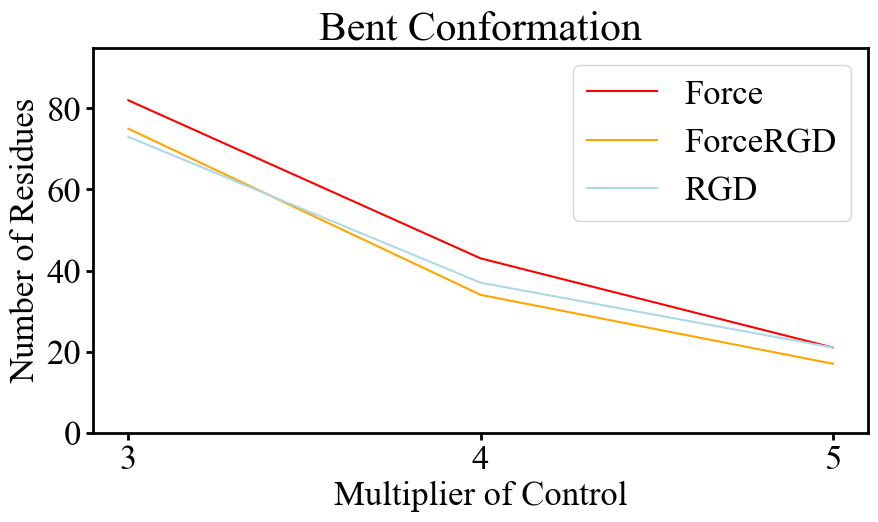

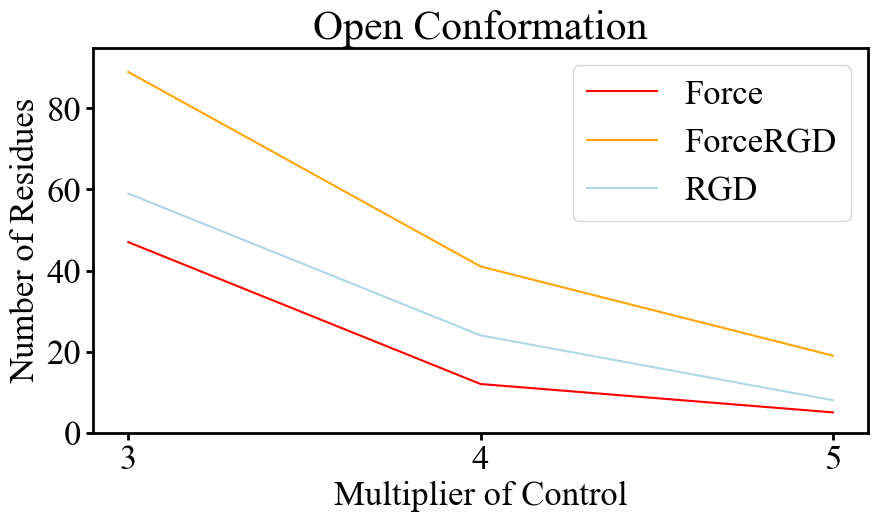

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# File paths
files = [
    "0.BC_bent_control_betweenness_value_filter0.30.dat",
    "0.BC_bent_Force_betweenness_value_filter0.30.dat",
    "0.BC_bent_ForceRGD_betweenness_value_filter0.30.dat",
    "0.BC_bent_RGD_betweenness_value_filter0.30.dat",
    "0.BC_open_control_betweenness_value_filter0.30.dat",
    "0.BC_open_Force_betweenness_value_filter0.30.dat",
    "0.BC_open_ForceRGD_betweenness_value_filter0.30.dat",
    "0.BC_open_RGD_betweenness_value_filter0.30.dat"
]

# Load data
bent_data = {}
open_data = {}
for file in files:
    condition = file.split('_')[2]  # Extract the condition name (e.g., 'control', 'Force', 'ForceRGD', 'RGD')
    conformation = file.split('_')[1]  # Extract the conformation (bent or open)
    data = pd.read_csv(file, delim_whitespace=True, header=None, names=["Residue", "Betweenness", "Condition"])
    if conformation == 'bent':
        bent_data[condition] = data
    else:
        open_data[condition] = data

# Copy the first column of bent control to all bent conditions
reference_residues = bent_data['control']["Residue"]
for condition in bent_data.keys():
    bent_data[condition]["Residue"] = reference_residues

# Normalize each condition to the control condition
bent_control = bent_data['control']
open_control = open_data['control']

normalized_bent_data = {}
normalized_open_data = {}

for condition in bent_data.keys():
    if condition != 'control':
        # Normalize bent data to control
        merged_bent = pd.merge(bent_data[condition], bent_control, on="Residue", suffixes=("", "_control"))
        merged_bent["Normalized_Betweenness"] = merged_bent["Betweenness"] / merged_bent["Betweenness_control"]
        normalized_bent_data[condition] = merged_bent
        
        # Normalize open data to control
        merged_open = pd.merge(open_data[condition], open_control, on="Residue", suffixes=("", "_control"))
        merged_open["Normalized_Betweenness"] = merged_open["Betweenness"] / merged_open["Betweenness_control"]
        normalized_open_data[condition] = merged_open

# Count residues that are 1X, 2X, 3X, ... times of the control condition
def count_residues_by_multiplier(normalized_data, multipliers):
    counts = {multiplier: 0 for multiplier in multipliers}
    for multiplier in multipliers:
        counts[multiplier] = normalized_data[normalized_data["Normalized_Betweenness"] >= multiplier].shape[0]
    return counts

multipliers = [1, 2, 3, 4, 5]

# Analyze bent and open conditions
bent_counts_all = {}
open_counts_all = {}

for condition in normalized_bent_data.keys():
    bent_counts = count_residues_by_multiplier(normalized_bent_data[condition], multipliers)
    open_counts = count_residues_by_multiplier(normalized_open_data[condition], multipliers)
    
    bent_counts_all[condition] = bent_counts
    open_counts_all[condition] = open_counts
    
    print(f"\nResidue counts for {condition} (Bent):")
    for multiplier, count in bent_counts.items():
        print(f"There are {count} residues >= {multiplier}X of the control bent")
    
    print(f"\nResidue counts for {condition} (Open):")
    for multiplier, count in open_counts.items():
        print(f"There are {count} residues >= {multiplier}X of the control open")

# Plot number of residues for bent and open in two plots (only for 3X, 4X, 5X)
plt.rcParams.update({
    'font.size': 25,
    'font.family': 'Times New Roman',
    'figure.figsize': (10, 5),
    'axes.linewidth': 2,
    'xtick.major.size': 5,
    'ytick.major.size': 5,
    'xtick.major.width': 2,
    'ytick.major.width': 2,
})

# Plot bent conditions
fig, ax = plt.subplots()
for condition, counts in bent_counts_all.items():
    if condition != 'control':
        ax.plot([3, 4, 5], [counts[multiplier] for multiplier in [3, 4, 5]], label=condition, color={'RGD': 'lightblue', 'Force': 'red', 'ForceRGD': 'orange'}.get(condition, 'blue'))
ax.set_xlabel('Multiplier of Control')
ax.set_ylabel('Number of Residues')
ax.set_title('Bent Conformation')
ax.set_xticks([3, 4, 5])
ax.set_ylim([0, 95])
ax.set_yticks(np.arange(0, 96, 20))
ax.legend()
plt.savefig('bent_conditions_residue_counts_3x_5x.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

# Plot open conditions
fig, ax = plt.subplots()
for condition, counts in open_counts_all.items():
    if condition != 'control':
        ax.plot([3, 4, 5], [counts[multiplier] for multiplier in [3, 4, 5]], label=condition, color={'RGD': 'lightblue', 'Force': 'red', 'ForceRGD': 'orange'}.get(condition, 'blue'))
ax.set_xlabel('Multiplier of Control')
ax.set_ylabel('Number of Residues')
ax.set_title('Open Conformation')
ax.set_xticks([3, 4, 5])
ax.set_ylim([0, 95])
ax.set_yticks(np.arange(0, 96, 20))
ax.legend()
plt.savefig('open_conditions_residue_counts_3x_5x.png', format='png', dpi=300, bbox_inches='tight')
plt.show()



Residue counts for Force (Bent):
There are 964 residues >= 1X of the control bent
There are 222 residues >= 2X of the control bent
There are 82 residues >= 3X of the control bent
There are 43 residues >= 4X of the control bent
There are 21 residues >= 5X of the control bent

Residue counts for Force (Open):
There are 939 residues >= 1X of the control open
There are 159 residues >= 2X of the control open
There are 47 residues >= 3X of the control open
There are 12 residues >= 4X of the control open
There are 5 residues >= 5X of the control open

Residue counts for ForceRGD (Bent):
There are 935 residues >= 1X of the control bent
There are 206 residues >= 2X of the control bent
There are 75 residues >= 3X of the control bent
There are 34 residues >= 4X of the control bent
There are 17 residues >= 5X of the control bent

Residue counts for ForceRGD (Open):
There are 897 residues >= 1X of the control open
There are 207 residues >= 2X of the control open
There are 89 residues >= 3X of the 

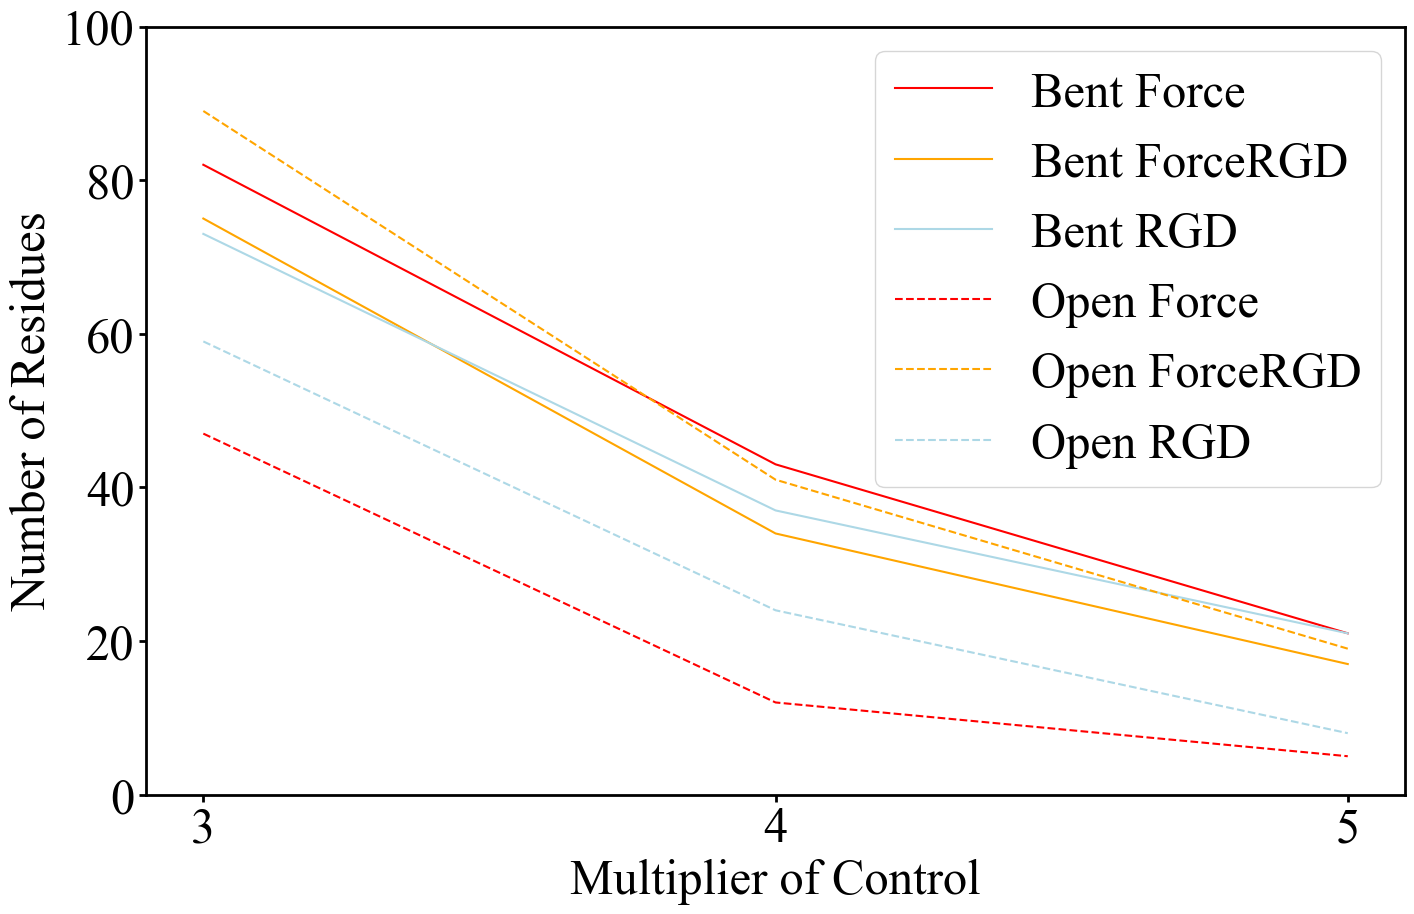

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# File paths
files = [
    "0.BC_bent_control_betweenness_value_filter0.30.dat",
    "0.BC_bent_Force_betweenness_value_filter0.30.dat",
    "0.BC_bent_ForceRGD_betweenness_value_filter0.30.dat",
    "0.BC_bent_RGD_betweenness_value_filter0.30.dat",
    "0.BC_open_control_betweenness_value_filter0.30.dat",
    "0.BC_open_Force_betweenness_value_filter0.30.dat",
    "0.BC_open_ForceRGD_betweenness_value_filter0.30.dat",
    "0.BC_open_RGD_betweenness_value_filter0.30.dat"
]

# Load data
bent_data = {}
open_data = {}
for file in files:
    condition = file.split('_')[2]  # Extract the condition name (e.g., 'control', 'Force', 'ForceRGD', 'RGD')
    conformation = file.split('_')[1]  # Extract the conformation (bent or open)
    data = pd.read_csv(file, delim_whitespace=True, header=None, names=["Residue", "Betweenness", "Condition"])
    if conformation == 'bent':
        bent_data[condition] = data
    else:
        open_data[condition] = data

# Copy the first column of bent control to all bent conditions
reference_residues = bent_data['control']["Residue"]
for condition in bent_data.keys():
    bent_data[condition]["Residue"] = reference_residues

# Normalize each condition to the control condition
bent_control = bent_data['control']
open_control = open_data['control']

normalized_bent_data = {}
normalized_open_data = {}

for condition in bent_data.keys():
    if condition != 'control':
        # Normalize bent data to control
        merged_bent = pd.merge(bent_data[condition], bent_control, on="Residue", suffixes=("", "_control"))
        merged_bent["Normalized_Betweenness"] = merged_bent["Betweenness"] / merged_bent["Betweenness_control"]
        normalized_bent_data[condition] = merged_bent
        
        # Normalize open data to control
        merged_open = pd.merge(open_data[condition], open_control, on="Residue", suffixes=("", "_control"))
        merged_open["Normalized_Betweenness"] = merged_open["Betweenness"] / merged_open["Betweenness_control"]
        normalized_open_data[condition] = merged_open

# Count residues that are 1X, 2X, 3X, ... times of the control condition
def count_residues_by_multiplier(normalized_data, multipliers):
    counts = {multiplier: 0 for multiplier in multipliers}
    for multiplier in multipliers:
        counts[multiplier] = normalized_data[normalized_data["Normalized_Betweenness"] >= multiplier].shape[0]
    return counts

multipliers = [1, 2, 3, 4, 5]

# Analyze bent and open conditions
bent_counts_all = {}
open_counts_all = {}

for condition in normalized_bent_data.keys():
    bent_counts = count_residues_by_multiplier(normalized_bent_data[condition], multipliers)
    open_counts = count_residues_by_multiplier(normalized_open_data[condition], multipliers)
    
    bent_counts_all[condition] = bent_counts
    open_counts_all[condition] = open_counts
    
    print(f"\nResidue counts for {condition} (Bent):")
    for multiplier, count in bent_counts.items():
        print(f"There are {count} residues >= {multiplier}X of the control bent")
    
    print(f"\nResidue counts for {condition} (Open):")
    for multiplier, count in open_counts.items():
        print(f"There are {count} residues >= {multiplier}X of the control open")

# Plot number of residues for bent and open in one figure (only for 3X, 4X, 5X)
plt.rcParams.update({
    'font.size': 35,
    'font.family': 'Times New Roman',
    'figure.figsize': (15, 10),
    'axes.linewidth': 2,
    'xtick.major.size': 5,
    'ytick.major.size': 5,
    'xtick.major.width': 2,
    'ytick.major.width': 2,
})

fig, ax = plt.subplots()

# Plot bent conditions
for condition, counts in bent_counts_all.items():
    if condition != 'control':
        ax.plot([3, 4, 5], [counts[multiplier] for multiplier in [3, 4, 5]], label=f'Bent {condition}', linestyle='-', color={'RGD': 'lightblue', 'Force': 'red', 'ForceRGD': 'orange'}.get(condition, 'blue'))

# Plot open conditions
for condition, counts in open_counts_all.items():
    if condition != 'control':
        ax.plot([3, 4, 5], [counts[multiplier] for multiplier in [3, 4, 5]], label=f'Open {condition}', linestyle='--', color={'RGD': 'lightblue', 'Force': 'red', 'ForceRGD': 'orange'}.get(condition, 'blue'))

ax.set_xlabel('Multiplier of Control')
ax.set_ylabel('Number of Residues')
#ax.set_title('Bent and Open Conformations')
ax.set_xticks([3, 4, 5])
ax.set_ylim([0, 100])
ax.set_yticks(np.arange(0, 101, 20))
ax.legend()

plt.tight_layout()
plt.savefig('bent_open_conditions_residue_counts_combined_3x_5x.png', format='png', dpi=300, bbox_inches='tight')
plt.show()


In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# File paths for bent data
files = [
    "0.BC_bent_control_betweenness_value_filter0.30.dat",
    "0.BC_bent_Force_betweenness_value_filter0.30.dat",
    "0.BC_bent_ForceRGD_betweenness_value_filter0.30.dat",
    "0.BC_bent_RGD_betweenness_value_filter0.30.dat"
]

# Load data for bent
bent_data = {}
for file in files:
    condition = file.split('_')[2]  # Extract the condition name
    data = pd.read_csv(file, delim_whitespace=True, header=None, names=["Residue", "Betweenness", "Condition"])
    bent_data[condition] = data

# Copy the first column of bent control to all bent conditions
reference_residues = bent_data['control']["Residue"]
for condition in bent_data.keys():
    bent_data[condition]["Residue"] = reference_residues

# Normalize each condition to the control condition
bent_control = bent_data['control']
normalized_bent_data = {}

for condition in bent_data.keys():
    if condition != 'control':
        # Normalize bent data to control
        merged_bent = pd.merge(bent_data[condition], bent_control, on="Residue", suffixes=("", "_control"))
        merged_bent["Normalized_Betweenness"] = merged_bent["Betweenness"] / merged_bent["Betweenness_control"]
        normalized_bent_data[condition] = merged_bent

# Define domains based on residue ranges
domains = {
    'beta-propeller': (1, 452),
    'Thigh': (453, 608),
    'Calf-1': (609, 743),
    'Calf-2': (744, 964),
    'Transmembrane_alpha': (965, 1008),
    'Beta I': (1118, 1360),
    'Hybrid': list(range(1067, 1118)) + list(range(1361, 1441)),  # Combined Hybrid domains
    'Psi': (1009, 1065),
    'E1-E4': (1441, 1604),  # Combined E1 to E4 as one domain
    'Beta-T': (1605, 1698),
    'Transmembrane_beta': (1699, 1770)
}

# Count residues that are more than 2X the control in each domain and total
output = []

for condition, data in normalized_bent_data.items():
    if condition in ['RGD', 'Force', 'ForceRGD']:
        domain_counts = {}
        total_count = data[data["Normalized_Betweenness"] >= 2].shape[0]  # Total number of residues >= 2X
        for domain, residues in domains.items():
            if isinstance(residues, tuple):  # For range-based domains
                mask = (data["Residue"] >= residues[0]) & (data["Residue"] <= residues[1])
            elif isinstance(residues, list):  # For list-based domains
                mask = data["Residue"].isin(residues)
            count = data[mask & (data["Normalized_Betweenness"] >= 2)].shape[0]
            domain_counts[domain] = count
        output.append({"Condition": condition, "Total Count": total_count, "Domain Counts": domain_counts})

# Save the results to a text file
with open("bent_domain_analysis_with_totals.txt", "w") as f:
    for entry in output:
        f.write(f"Condition: {entry['Condition']}\n")
        f.write(f"  Total residues >= 2X: {entry['Total Count']}\n")
        for domain, count in entry["Domain Counts"].items():
            f.write(f"  {domain}: {count} residues\n")
        f.write("\n")

# Output the results
print("Analysis completed. Results saved to 'bent_domain_analysis_with_totals.txt'.")


Analysis completed. Results saved to 'bent_domain_analysis_with_totals.txt'.


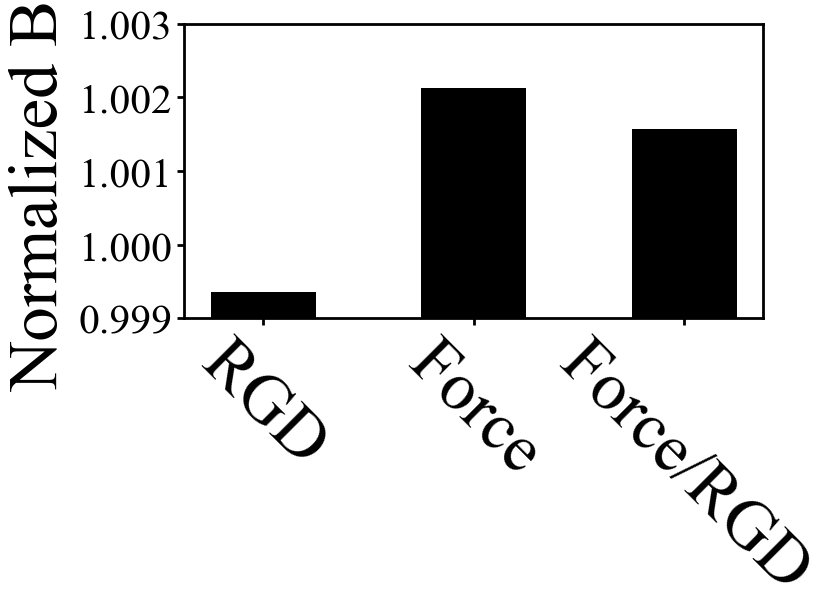

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# Average BC values for Bent under different conditions
conditions = ['RGD', 'Force', 'Force/RGD']
bent_bc = [0.0016815808, 0.0016804927, 0.0016851452, 0.0016842192]

# Normalize the Bent values by the Control condition
control_value = bent_bc[0]
normalized_bent_bc = [value / control_value for value in bent_bc[1:]]  # Exclude the Control condition itself

# Bar width and index positions
bar_width = 0.5
index = np.arange(len(conditions))

# Plot normalized Bent values
fig, ax = plt.subplots(figsize=(9, 7))
bent_bars = ax.bar(index, normalized_bent_bc, bar_width, color='black', label='Normalized Bent')

# Set axis labels and title
ax.set_ylabel('Normalized BC', fontsize=50, fontname='Times New Roman')
ax.set_xticks(index)
ax.set_xticklabels(conditions, rotation=-45, ha='center', fontsize=50, fontname='Times New Roman')
ax.set_ylim([0.999, 1.003])
ax.set_yticks(np.linspace(0.999, 1.003, 5))
ax.set_yticklabels([f'{y:.3f}' for y in np.linspace(0.999, 1.003, 5)], fontsize=30, fontname='Times New Roman')

# Adjust layout for better visibility
plt.tight_layout()

# Save and display the plot
plt.savefig('normalized_bent_bc_bar_plot.png', dpi=600)
plt.show()


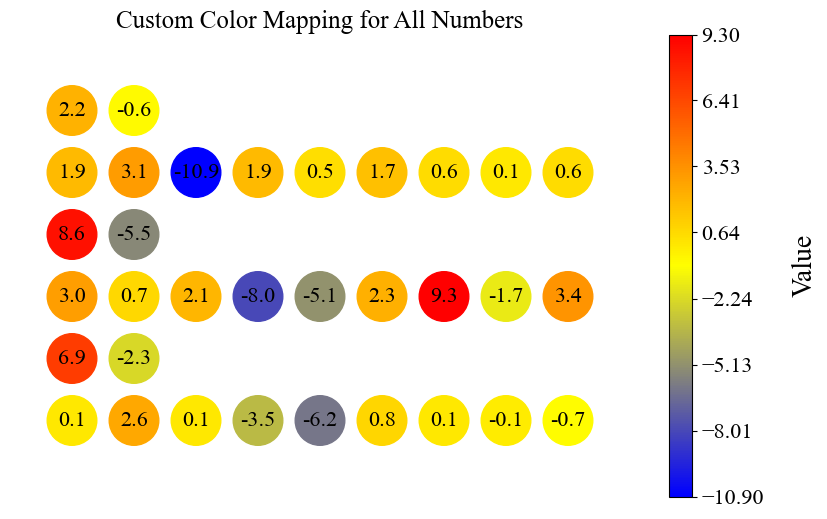

In [19]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

# Input data: All numbers
data = [
    [0.1, 2.6, 0.1, -3.5, -6.2, 0.8, 0.10, -0.08, -0.7],
    [6.9, -2.3],
    [3.0, 0.7, 2.1, -8.0, -5.1, 2.3, 9.3, -1.66, 3.4],
    [8.6, -5.5],
    [1.9, 3.1, -10.9, 1.9, 0.5, 1.7, 0.60, 0.09, 0.6],
    [2.2, -0.6]
]

# Flatten the data for normalization
flattened_data = [item for sublist in data for item in sublist]
min_value = min(flattened_data)
max_value = max(flattened_data)

# Custom colormap (Blue -> Yellow -> Red)
colors = ["blue", "yellow", "red"]
cmap = mcolors.LinearSegmentedColormap.from_list("custom_colormap", colors)
norm = mcolors.Normalize(vmin=min_value, vmax=max_value)

# Create a figure
fig, ax = plt.subplots(figsize=(10, 6))

# Add colored circles at respective positions
x_positions = [0, 1, 2, 3, 4, 5, 6, 7, 8]  # X axis positions
y_positions = [5, 4, 3, 2, 1, 0]  # Y axis positions

for y_idx, row in enumerate(data):
    for x_idx, value in enumerate(row):
        color = cmap(norm(value))
        ax.add_patch(plt.Circle((x_idx, y_idx), 0.4, color=color))
        ax.text(x_idx, y_idx, f"{value:.1f}", ha='center', va='center', color='black',fontname="Times New Roman", fontsize=16)

# Adjust plot settings
ax.set_xlim(-1, 9)
ax.set_ylim(-1, 6)
ax.set_aspect('equal')
ax.axis('off')
# Add a vertical color bar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

# Add vertical colorbar
cbar = fig.colorbar(sm, ax=ax, orientation="vertical", ticks=values)

# Set font properties for ticks and labels
cbar.ax.tick_params(labelsize=16)  # Adjust tick font size
for label in cbar.ax.get_yticklabels():
    label.set_fontname("Times New Roman")  # Set font for tick labels

cbar.ax.set_ylabel("Value", fontsize=20, fontname="Times New Roman", labelpad=20)




plt.title("Custom Color Mapping for All Numbers", fontsize=18, fontname="Times New Roman", pad=15)

# Save the figure before displaying
plt.savefig("deltabar.png", dpi=600, bbox_inches="tight")  # High-quality save

plt.show()



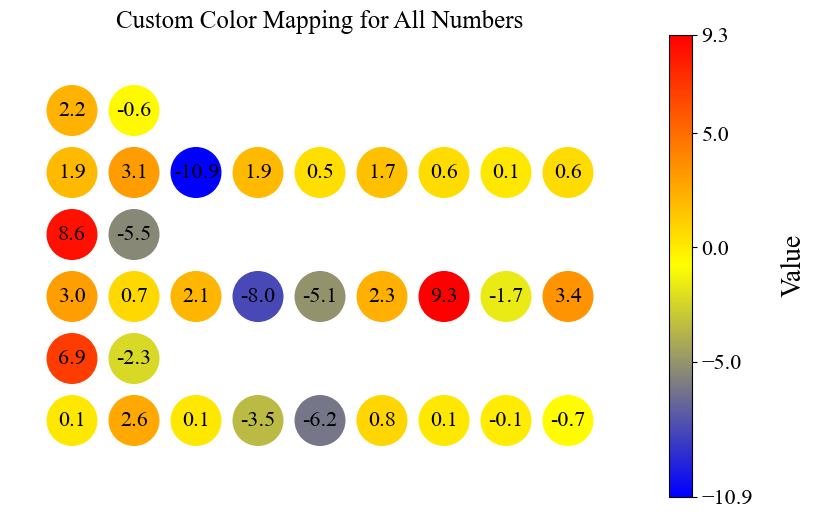

In [2]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

# Input data: All numbers
data = [
    [0.1, 2.6, 0.1, -3.5, -6.2, 0.8, 0.10, -0.08, -0.7],
    [6.9, -2.3],
    [3.0, 0.7, 2.1, -8.0, -5.1, 2.3, 9.3, -1.66, 3.4],
    [8.6, -5.5],
    [1.9, 3.1, -10.9, 1.9, 0.5, 1.7, 0.60, 0.09, 0.6],
    [2.2, -0.6]
]

# Flatten the data for normalization
flattened_data = [item for sublist in data for item in sublist]
min_value = min(flattened_data)
max_value = max(flattened_data)

# Custom colormap (Blue -> Yellow -> Red)
colors = ["blue", "yellow", "red"]
cmap = mcolors.LinearSegmentedColormap.from_list("custom_colormap", colors)
norm = mcolors.Normalize(vmin=min_value, vmax=max_value)

# Create a figure
fig, ax = plt.subplots(figsize=(10, 6))

# Add colored circles at respective positions
x_positions = [0, 1, 2, 3, 4, 5, 6, 7, 8]  # X axis positions
y_positions = [5, 4, 3, 2, 1, 0]  # Y axis positions

for y_idx, row in enumerate(data):
    for x_idx, value in enumerate(row):
        color = cmap(norm(value))
        ax.add_patch(plt.Circle((x_idx, y_idx), 0.4, color=color))
        ax.text(x_idx, y_idx, f"{value:.1f}", ha='center', va='center', color='black', fontname="Times New Roman", fontsize=16)

# Adjust plot settings
ax.set_xlim(-1, 9)
ax.set_ylim(-1, 6)
ax.set_aspect('equal')
ax.axis('off')

# Add a vertical color bar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

# Define tick values for the color bar
ticks = [-10.9, -5, 0, 5, 9.3]

cbar = fig.colorbar(sm, ax=ax, orientation="vertical", ticks=ticks)

# Set font properties for ticks and labels
cbar.ax.tick_params(labelsize=16)  # Adjust tick font size
for label in cbar.ax.get_yticklabels():
    label.set_fontname("Times New Roman")  # Set font for tick labels

cbar.ax.set_ylabel("Value", fontsize=20, fontname="Times New Roman", labelpad=20)

plt.title("Custom Color Mapping for All Numbers", fontsize=18, fontname="Times New Roman", pad=15)

# Save the figure before displaying
plt.savefig("deltabar.png", dpi=600, bbox_inches="tight")  # High-quality save

plt.show()


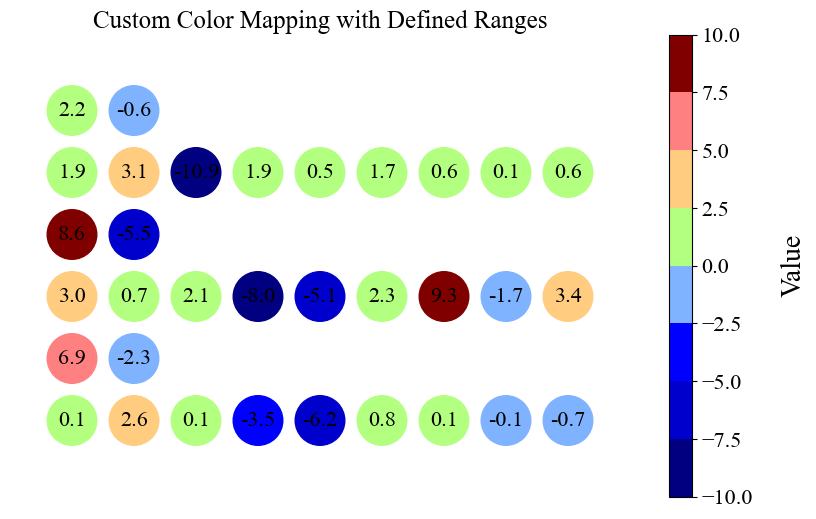

In [6]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

# Input data: All numbers
data = [
    [0.1, 2.6, 0.1, -3.5, -6.2, 0.8, 0.10, -0.08, -0.7],
    [6.9, -2.3],
    [3.0, 0.7, 2.1, -8.0, -5.1, 2.3, 9.3, -1.66, 3.4],
    [8.6, -5.5],
    [1.9, 3.1, -10.9, 1.9, 0.5, 1.7, 0.60, 0.09, 0.6],
    [2.2, -0.6]
]

# Flatten the data for normalization
flattened_data = [item for sublist in data for item in sublist]
min_value = min(flattened_data)
max_value = max(flattened_data)

# Define the custom colormap based on the specified ranges
colors = [
    (0, 0, 0.5),    # Dark blue (-7.5 to -10)
    (0, 0, 0.8),    # Navy (-5 to -7.5)
    (0, 0, 1),      # Blue (-2.5 to -5)
    (0.5, 0.7, 1),  # Light blue (0 to -2.5)
    (0.7, 1, 0.5),  # Light green (0 to 2.5)
    (1, 0.8, 0.5),  # Light orange (2.5 to 5)
    (1, 0.5, 0.5),  # Light red (5 to 7.5)
    (0.5, 0, 0)     # Dark red (7.5 to 10)
]
boundaries = [-10, -7.5, -5, -2.5, 0, 2.5, 5, 7.5, 10]
cmap = mcolors.ListedColormap(colors)
norm = mcolors.BoundaryNorm(boundaries, cmap.N)

# Create a figure
fig, ax = plt.subplots(figsize=(10, 6))

# Add colored circles at respective positions
x_positions = [0, 1, 2, 3, 4, 5, 6, 7, 8]  # X axis positions
y_positions = [5, 4, 3, 2, 1, 0]  # Y axis positions

for y_idx, row in enumerate(data):
    for x_idx, value in enumerate(row):
        color = cmap(norm(value))
        ax.add_patch(plt.Circle((x_idx, y_idx), 0.4, color=color))
        ax.text(x_idx, y_idx, f"{value:.1f}", ha='center', va='center', color='black', fontname="Times New Roman", fontsize=16)

# Adjust plot settings
ax.set_xlim(-1, 9)
ax.set_ylim(-1, 6)
ax.set_aspect('equal')
ax.axis('off')

# Add a vertical color bar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

# Define tick values for the color bar
ticks = [-10, -7.5, -5, -2.5, 0, 2.5, 5, 7.5, 10]

cbar = fig.colorbar(sm, ax=ax, orientation="vertical", ticks=ticks)

# Set font properties for ticks and labels
cbar.ax.tick_params(labelsize=16)  # Adjust tick font size
for label in cbar.ax.get_yticklabels():
    label.set_fontname("Times New Roman")  # Set font for tick labels

cbar.ax.set_ylabel("Value", fontsize=20, fontname="Times New Roman", labelpad=20)

plt.title("Custom Color Mapping with Defined Ranges", fontsize=18, fontname="Times New Roman", pad=15)

# Save the figure before displaying
plt.savefig("range_based_colormap.png", dpi=600, bbox_inches="tight")  # High-quality save

plt.show()
